In [1]:
# Step 1: Import the required libraries and load the data
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
data = pd.read_csv("renttherunway.csv")

In [4]:
# Step 2: Check the first few samples, shape, info of the data
print(data.head())
print(data.shape)
print(data.info())

   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category 

In [5]:
# Step 3: Check for duplicate records and drop them
data.drop_duplicates(inplace=True)

In [6]:
# Step 4: Drop redundant columns
data.drop(columns=['user_id', 'item_id', 'review_text'], inplace=True)

In [7]:
# Step 5: Convert 'weight' column to float
data['weight'] = data['weight'].str.replace('lbs', '').astype(float)

In [8]:
# Step 6: Group 'party: cocktail' category with 'party'
data['rented for'] = data['rented for'].replace('party: cocktail', 'party')

In [11]:
# Step 7: Convert 'height' column from feet to inches
def convert_height(height):
    if isinstance(height, str):
        feet, inches = height.split("'")
        total_inches = int(feet) * 12 + int(inches.strip('"'))
        return total_inches
    else:
        return height  # No conversion needed for non-string values

data['height'] = data['height'].apply(convert_height)


In [13]:
# Step 8: Check for missing values and impute them
data.ffill(inplace=True)

In [14]:
# Step 9: Check statistical summary
print(data.describe())
print(data.describe(include='object'))    

          Unnamed: 0         weight         rating         height  \
count  192544.000000  192544.000000  192544.000000  192544.000000   
mean    96271.500000     137.390804       9.092374      65.310880   
std     55582.809453      21.905107       1.430134       2.664043   
min         0.000000      50.000000       2.000000      54.000000   
25%     48135.750000     123.000000       8.000000      63.000000   
50%     96271.500000     135.000000      10.000000      65.000000   
75%    144407.250000     148.000000      10.000000      67.000000   
max    192543.000000     300.000000      10.000000      78.000000   

                size            age  
count  192544.000000  192544.000000  
mean       12.245175      33.870887  
std         8.494877       8.056728  
min         0.000000       0.000000  
25%         8.000000      29.000000  
50%        12.000000      32.000000  
75%        16.000000      37.000000  
max        58.000000     117.000000  
           fit bust size rented for 

In [15]:
# Step 10: Treat outliers in the 'age' column
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR)))]

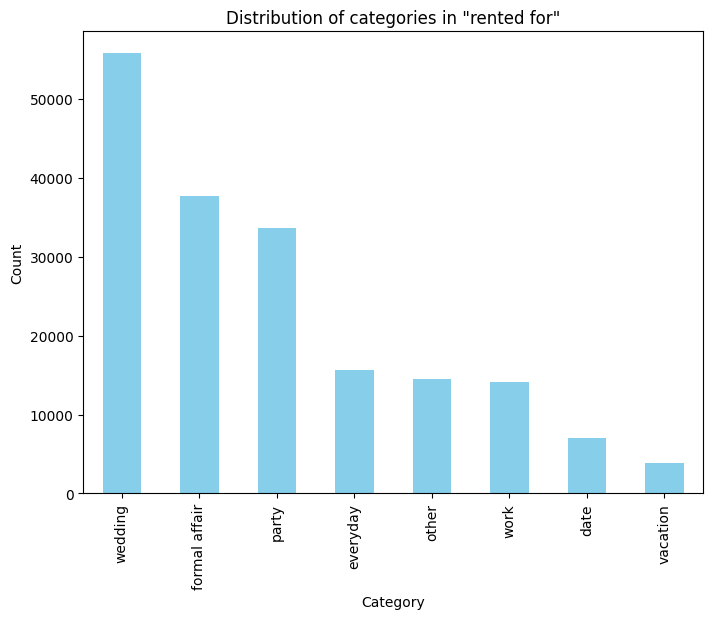

In [16]:
# Step 11: Check distribution of 'rented for' categories
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
data['rented for'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of categories in "rented for"')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [18]:
# Step 12: Encode categorical variables using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_encoded = data.apply(lambda x: label_encoder.fit_transform(x.astype(str)) if x.dtype == 'object' else x)

In [19]:
# Step 13: Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

In [20]:
# Step 14: Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

In [21]:
# Determine number of components for 90-95% variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components for 95% variance explained:", n_components)

Number of components for 95% variance explained: 12


In [22]:
# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

In [23]:
# Step 15: Apply K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

In [24]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


C:\Users\Durga\AppData\Local\Programs\Python\Python312\python.exe: No module named pip
